### Keras CNN으로 패션 아이템 구분하기

1. 패키지 수입 및 하이퍼 파라미터 지정

In [51]:
# 패키지 수입
import matplotlib.pyplot as plt
import numpy as np

from time import time
from keras.datasets import fashion_mnist # 사분할이 된 데이터
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Flatten
from keras.layers import Dense, MaxPool2D
from keras.layers import Conv2D, InputLayer

In [52]:
# 하이퍼 파라미터
MY_EPOCH = 15 # 반복 학습 횟수. 데이터가 많기 때문에 가급적 낮은 수
MY_BATCH = 500 # 학습용 데이터를 몇 개 가져와서 계산할 지

2. 데이터 처리

In [53]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data() # 사분할이 완료된 데이터

print('학습용 입력 데이터 :', X_train.shape) # 3차원. (60000,28,28)이 출력. 28X28 화소가 60000개
print('학습용 출력 데이터 :', Y_train.shape) # 1차원 벡터
print('평가용 입력 데이터 :', X_test.shape)
print('평가용 출력 데이터 :', Y_test.shape)

학습용 입력 데이터 : (60000, 28, 28)
학습용 출력 데이터 : (60000,)
평가용 입력 데이터 : (10000, 28, 28)
평가용 출력 데이터 : (10000,)


학습용 데이터 첫번째 이미지의 화소 정보
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1

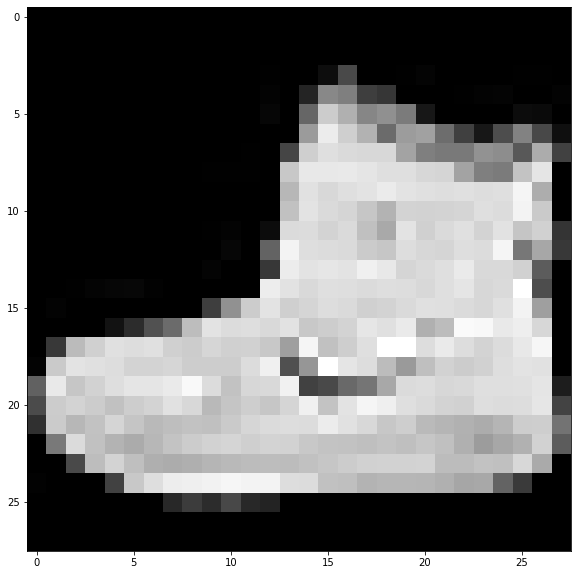

In [54]:
# 데이터 샘플 출력
print('학습용 데이터 첫번째 이미지의 화소 정보')
print(X_train[0])
plt.figure(figsize=(10,10))
plt.imshow(X_train[0], cmap='gray')
print('학습용 데이터 첫번째 이미지의 라벨 :',Y_train[0])

In [55]:
# 데이터 스케일링
X_train = X_train / 255.0 # 0 ~ 1 사이의 수가 됨
# print(X_train[0])
X_test = X_test / 255.0

# 데이터 모양 정보 전환 - 이미지 채널 정보 추가(합성곱 함수를 사용하기 위해서 필요!)
X_train = X_train.reshape(60000, 28, 28, 1) # 4차원으로 전환. 마지막 1은 채널 정보로 직접 추가해 줘야 함
X_test = X_test.reshape(10000, 28, 28, 1)

In [56]:
# 라벨 정보 수정
Y_train = np_utils.to_categorical(Y_train,10) # 원 핫 인코딩 
print('학습용 데이터 첫번째 이미지의 라벨 :',Y_train[0])
Y_test = np_utils.to_categorical(Y_test,10) # 원 핫 인코딩 

print('학습용 입력 데이터 :', X_train.shape) # (60000,28,28,1)이 출력.
print('학습용 출력 데이터 :', Y_train.shape) # (60000, 10)이 출력
print('평가용 입력 데이터 :', X_test.shape) # (60000,28,28,1)이 출력.
print('평가용 출력 데이터 :', Y_test.shape) # (10000, 10)이 출력

학습용 데이터 첫번째 이미지의 라벨 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
학습용 입력 데이터 : (60000, 28, 28, 1)
학습용 출력 데이터 : (60000, 10)
평가용 입력 데이터 : (10000, 28, 28, 1)
평가용 출력 데이터 : (10000, 10)


3. 인공 신경망 구현

In [57]:
# CNN 구현
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))

# 첫번째 합성곱 블럭
model.add(Conv2D(filters=32, # 만들 이미지의 개수
                 kernel_size=2, # 필터 크기
                 padding='same', # 합성곱 전과 후의 화소수 유지
                 activation='tanh')) # 음수는 0으로

model.add(MaxPool2D(pool_size=2)) # 풀링. 2배로 줄어듦

# 두번째 합성곱 블럭
model.add(Conv2D(filters=64, # 학습용 데이터를 몇 개 가져와서 계산할 지
                 kernel_size=2,
                 padding='same',
                 activation='tanh'))
             
model.add(MaxPool2D(pool_size=2)) # 2배로 줄어듦

# DNN 입성
model.add(Flatten()) # 남아있는 화소들을 은닉층 뉴런으로

model.add(Dense(units=128,
                activation='tanh')) # 은닉층에 몇개의 뉴런이 있는지 지정

# Softmax : 0~1 사이의 값. 확률을 구하는 것. 출력의 총합은 1
model.add(Dense(units=10, # 활성화 아이템이 10 종류
                activation='softmax')) # relu X

print('* CNN 요약 *')
model.summary()


* CNN 요약 *
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_11 (Dense)             (None, 10)    

4. 인공 신경망 학습

In [58]:
# 학습 방식 설정
model.compile(optimizer='adam',
              loss='mse', 
              metrics=['acc'])

# CNN 학습
print('학습 시작')
begin = time()

model.fit(x=X_train,
          y=Y_train,
          epochs=MY_EPOCH,
          batch_size=MY_BATCH, 
          verbose=1) # 학습 진행 내용 출력?

end = time()
print('학습 시간: {:.2f}'.format(end-begin)) # GPU로 설정해보기

학습 시작
Epoch 1/15
120/120 [==============================] - 2s 11ms/step - loss: 0.0403 - acc: 0.6986
Epoch 2/15
120/120 [==============================] - 1s 10ms/step - loss: 0.0195 - acc: 0.8654
Epoch 3/15
120/120 [==============================] - 1s 10ms/step - loss: 0.0169 - acc: 0.8840
Epoch 4/15
120/120 [==============================] - 1s 10ms/step - loss: 0.0153 - acc: 0.8959
Epoch 5/15
120/120 [==============================] - 1s 10ms/step - loss: 0.0143 - acc: 0.9032
Epoch 6/15
120/120 [==============================] - 1s 10ms/step - loss: 0.0135 - acc: 0.9085
Epoch 7/15
120/120 [==============================] - 1s 10ms/step - loss: 0.0123 - acc: 0.9171
Epoch 8/15
120/120 [==============================] - 1s 10ms/step - loss: 0.0115 - acc: 0.9242
Epoch 9/15
120/120 [==============================] - 1s 10ms/step - loss: 0.0111 - acc: 0.9275
Epoch 10/15
120/120 [==============================] - 1s 10ms/step - loss: 0.0104 - acc: 0.9323
Epoch 11/15
120/120 [============

5. CNN 평가

In [59]:
# CNN 평가
score = model.evaluate(x=X_test,
                       y=Y_test,
                       verbose=1)

print('최종 손실값 : {:.2f}'.format(score[0]))
print('최종 정확도 : {:.2f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0131 - acc: 0.9104
최종 손실값 : 0.01
최종 정확도 : 0.91


6. CNN 예측

(28, 28, 1)
CNN 예측 값 : [[1.8858302e-07 6.5341300e-07 5.2024548e-06 7.4888663e-07 2.7167810e-06
  2.3671723e-04 5.7321877e-06 8.0517289e-04 1.9034909e-05 9.9892384e-01]]
정답 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


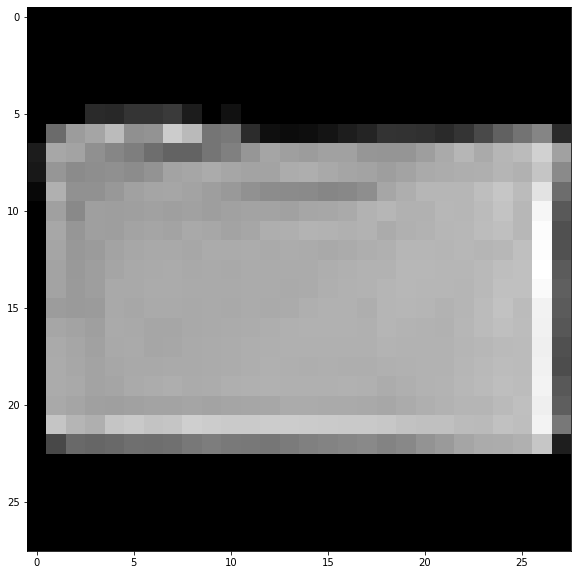

In [60]:
# 샘플 이미지 지정
image = X_test[0]
print(image.shape)

# batch 정보 추가. (이미지 수,가운데는 화소 정보, 채널 정보)
# 기계학습에서 batch의 역할 : 매번 학습용 데이터를 몇 개 가져와서 계산하는지 지정
image = image.reshape(1, 28, 28, 1)
pred = model.predict(image)

# 정보 출력 - SOFT MAX된 10개의 확률이 출력됨
print('CNN 예측 값 :', pred) # 확률이 가장 높은 것이 정답일 것이다
print('정답 :', Y_test[0])

# 사진을 출력할 때 채널 정보를 없애 주어야 함
plt.figure(figsize=(10,10))
tmp = X_train[1234].reshape(28, 28)
tmp = tmp * 255 # 정규화를 다시 돌림
plt.imshow(tmp, cmap='gray')